In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [141]:
# Importing Data
df = pd.read_csv("temperature.csv")

In [142]:
#checking our dataset
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [143]:
df.shape

(7752, 25)

In [144]:
#check data types
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [145]:
#checking mean, std, min,max values for numerical column
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [146]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [148]:
#checking null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

From above we can say that in our dateset there are null values 

In [149]:
# now we will slipt date column into three diff column day, month, year

df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

In [150]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


In [151]:
# we will drop the column date
df.drop(['Date'],axis=1,inplace = True)

In [152]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


In [153]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
year                float64
month               float64
day                 float64
dtype: object

In [154]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
year                 2
month                2
day                  2
dtype: int64

In [155]:
df.tail()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.0,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.0,8.0,30.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.0,8.0,30.0
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN
7751,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8,NaN,NaN,NaN


In [156]:
df.drop(df.tail(2).index, inplace=True)

In [157]:
df.tail()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,2017.0,8.0,30.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,2017.0,8.0,30.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,2017.0,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,2017.0,8.0,30.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.2713,4451.345215,27.8,17.4,2017.0,8.0,30.0


In [158]:
df.isnull().sum()

station              0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
year                 0
month                0
day                  0
dtype: int64

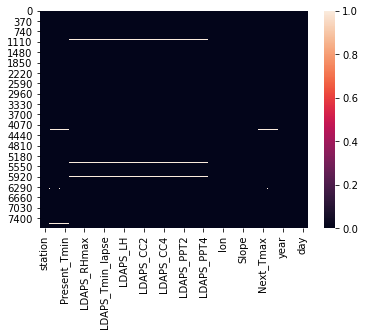

In [159]:
sns.heatmap(df.isnull())

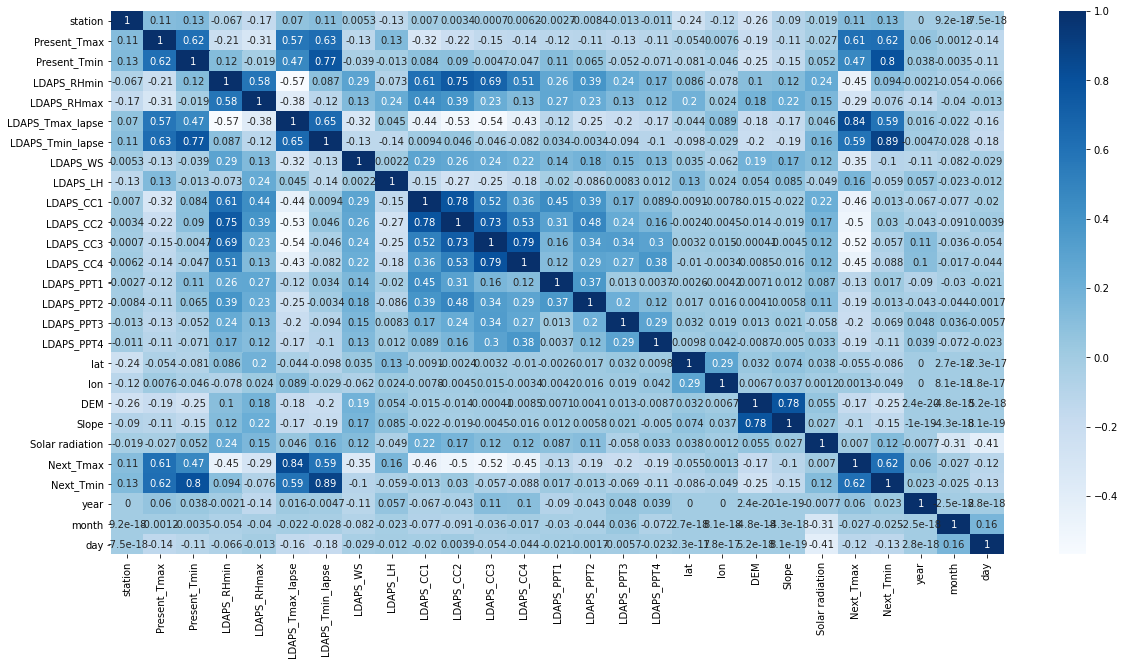

In [160]:
fig=plt.figure(figsize=(20,10))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues")

In [161]:
#We will deal with NaN values
df=df.fillna(df.mean())

In [162]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
year                0
month               0
day                 0
dtype: int64

In [163]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


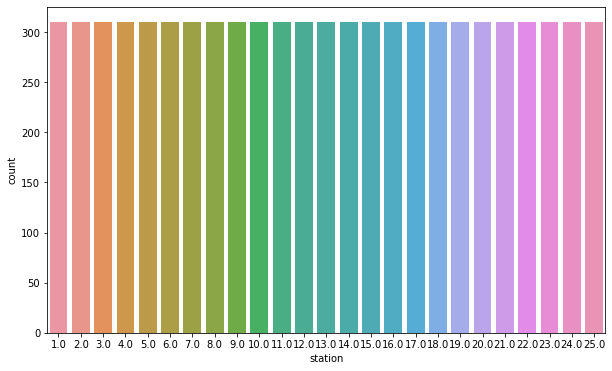

In [164]:
plt.figure(figsize=(10,6))
sns.countplot(x='station',data=df)
plt.show()

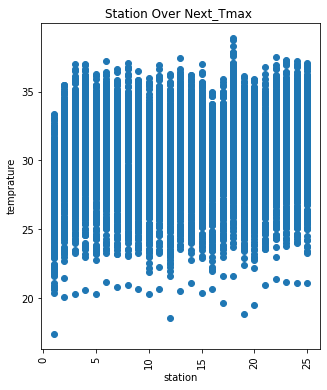

In [165]:
# scatter plot
plt.figure(figsize = (5, 6))
plt.title('Station Over Next_Tmax ')
plt.scatter(df['station'], df['Next_Tmax'])
plt.xticks(rotation = 90)
plt.xlabel('station')
plt.ylabel('temprature')
plt.show()

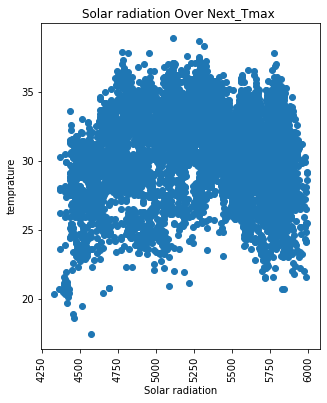

In [166]:
# scatter plot
plt.figure(figsize = (5, 6))
plt.title('Solar radiation Over Next_Tmax ')
plt.scatter(df['Solar radiation'], df['Next_Tmax'])
plt.xticks(rotation = 90)
plt.xlabel('Solar radiation')
plt.ylabel('temprature')
plt.show()

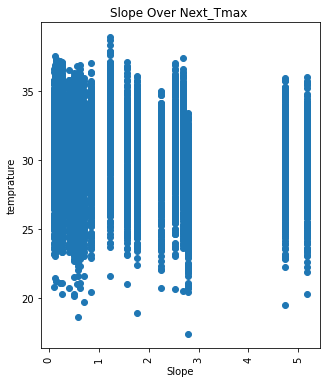

In [167]:
# scatter plot
plt.figure(figsize = (5, 6))
plt.title('Slope Over Next_Tmax ')
plt.scatter(df['Slope'], df['Next_Tmax'])
plt.xticks(rotation = 90)
plt.xlabel('Slope')
plt.ylabel('temprature')
plt.show()

In [168]:
df['Slope'].unique()

array([2.785 , 0.5141, 0.2661, 2.5348, 0.5055, 0.1457, 0.0985, 1.5629,
       0.4125, 5.1782, 0.6233, 0.5931, 2.6865, 0.618 , 0.8552, 2.2579,
       0.697 , 1.2313, 1.7678, 4.7296, 0.5721, 0.1332, 0.1554, 0.2223,
       0.2713])

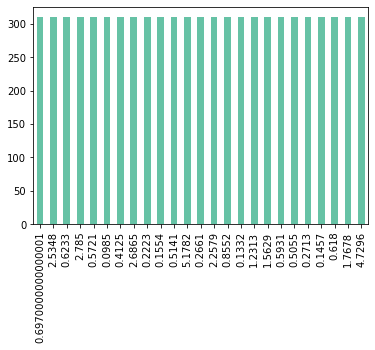

In [169]:
df['Slope'].value_counts().plot.bar(cmap='Set2')

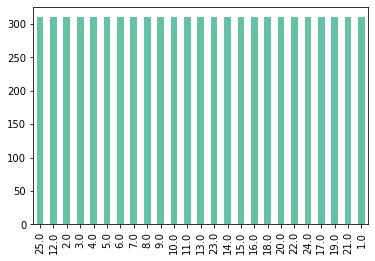

In [170]:
df['station'].value_counts().plot.bar(cmap='Set2')

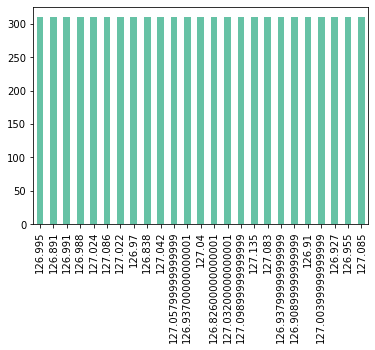

In [171]:
df['lon'].value_counts().plot.bar(cmap='Set2')

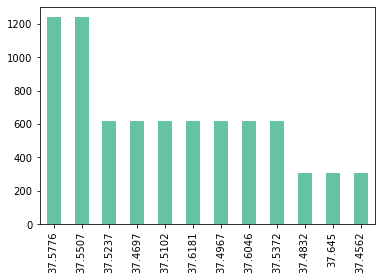

In [172]:
df['lat'].value_counts().plot.bar(cmap='Set2')

In [173]:
print('lat:',df['lat'].unique())
print('lon:',df['lon'].unique())

lat: [37.6046 37.5776 37.645  37.5507 37.5102 37.4697 37.4967 37.4562 37.5372
 37.6181 37.4832 37.5237]
lon: [126.991 127.032 127.058 127.022 127.135 127.042 126.838 126.91  126.826
 126.955 127.085 126.988 127.083 126.927 126.937 126.995 127.099 127.024
 126.938 127.004 127.04  127.086 126.891 126.909 126.97 ]


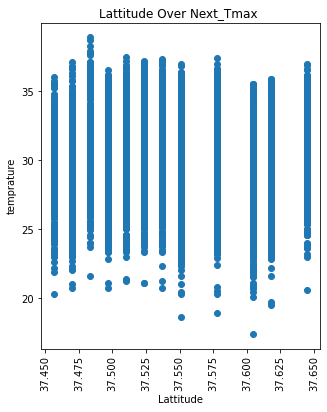

In [174]:
# scatter plot
plt.figure(figsize = (5, 6))
plt.title('Lattitude Over Next_Tmax ')
plt.scatter(df['lat'], df['Next_Tmax'])
plt.xticks(rotation = 90)
plt.xlabel('Lattitude')
plt.ylabel('temprature')
plt.show()

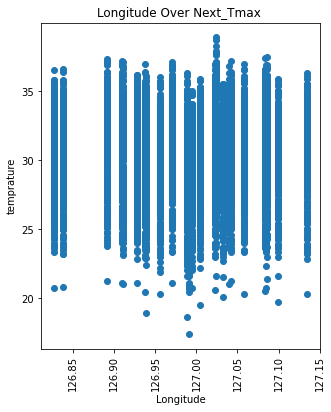

In [175]:
# scatter plot
plt.figure(figsize = (5, 6))
plt.title('Longitude Over Next_Tmax ')
plt.scatter(df['lon'], df['Next_Tmax'])
plt.xticks(rotation = 90)
plt.xlabel('Longitude')
plt.ylabel('temprature')
plt.show()

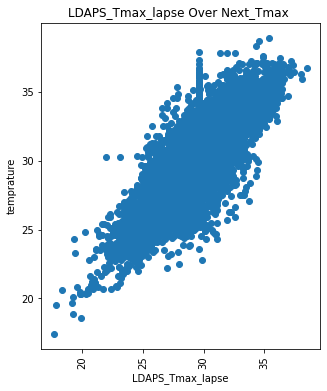

In [176]:
# scatter plot
plt.figure(figsize = (5, 6))
plt.title('LDAPS_Tmax_lapse Over Next_Tmax ')
plt.scatter(df['LDAPS_Tmax_lapse'], df['Next_Tmax'])
plt.xticks(rotation = 90)
plt.xlabel('LDAPS_Tmax_lapse')
plt.ylabel('temprature')
plt.show()

In [177]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
year                float64
month               float64
day                 float64
dtype: object

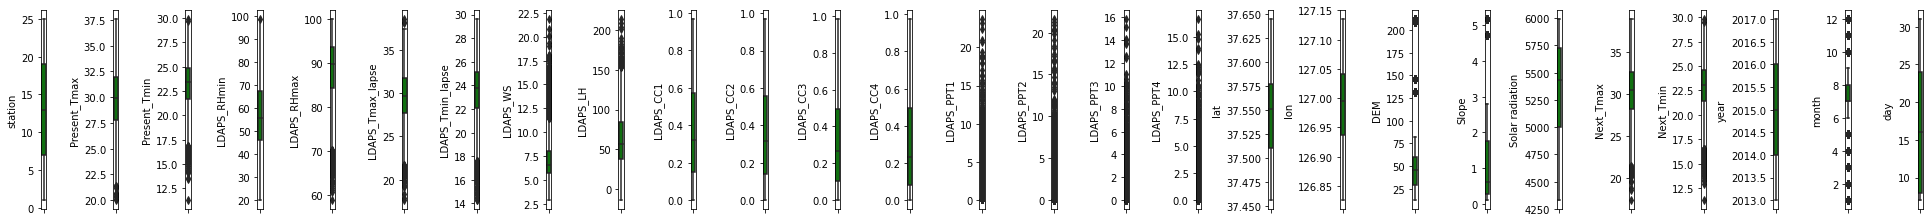

In [178]:
#We will check correlatation

collist = df.columns
ncol = 65
nrows = 25
plt.figure(figsize=(ncol,3*nrows))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color = 'green',orient='v')
    plt.tight_layout()

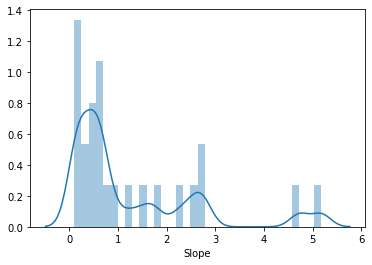

In [179]:
sns.distplot(df['Slope'])

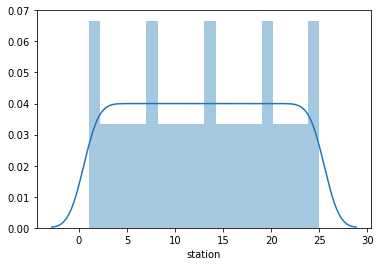

In [180]:
sns.distplot(df['station'])

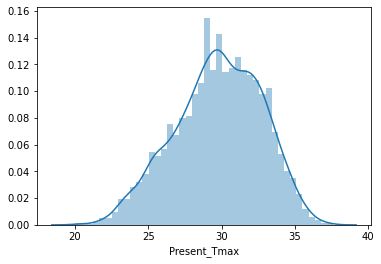

In [181]:
sns.distplot(df['Present_Tmax'])

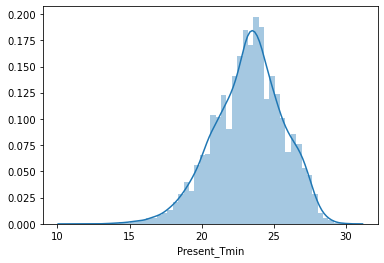

In [182]:
sns.distplot(df['Present_Tmin'])

In [183]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month,day
station,1.000000e+00,0.112786,0.131921,-0.066796,-0.167196,0.069223,0.104911,0.005294,-0.133575,0.006922,...,-2.376097e-01,-1.187626e-01,-2.559703e-01,-9.011266e-02,-0.019011,0.108154,0.128539,0.000000e+00,9.230762e-18,-7.467287e-18
Present_Tmax,1.127859e-01,1.000000,0.617699,-0.207063,-0.304831,0.568959,0.622540,-0.125521,0.133330,-0.313700,...,-5.413227e-02,7.526751e-03,-1.887788e-01,-1.073333e-01,-0.027008,0.609320,0.621706,5.986973e-02,-1.152107e-03,-1.439736e-01
Present_Tmin,1.319212e-01,0.617699,1.000000,0.120862,-0.018413,0.462183,0.762220,-0.038563,-0.012370,0.082933,...,-8.051962e-02,-4.555983e-02,-2.525179e-01,-1.483008e-01,0.051659,0.469903,0.795860,3.747517e-02,-3.441490e-03,-1.084986e-01
LDAPS_RHmin,-6.679610e-02,-0.207063,0.120862,1.000000,0.578472,-0.568528,0.087426,0.292438,-0.073447,0.613375,...,8.590934e-02,-7.769602e-02,1.009442e-01,1.225974e-01,0.243102,-0.441382,0.092732,-2.046436e-03,-5.399132e-02,-6.589936e-02
LDAPS_RHmax,-1.671955e-01,-0.304831,-0.018413,0.578472,1.000000,-0.377319,-0.117110,0.133479,0.237121,0.436177,...,1.947819e-01,2.422561e-02,1.764229e-01,2.189528e-01,0.147952,-0.287320,-0.075298,-1.420113e-01,-4.003864e-02,-1.302202e-02
LDAPS_Tmax_lapse,6.922327e-02,0.568959,0.462183,-0.568528,-0.377319,1.000000,0.652948,-0.317239,0.045198,-0.441029,...,-4.389584e-02,8.905060e-02,-1.808676e-01,-1.642717e-01,0.046231,0.826630,0.585411,1.619933e-02,-2.172562e-02,-1.605902e-01
LDAPS_Tmin_lapse,1.049107e-01,0.622540,0.762220,0.087426,-0.117110,0.652948,1.000000,-0.133944,-0.137862,0.009424,...,-9.801410e-02,-2.843003e-02,-1.972517e-01,-1.876267e-01,0.158568,0.585728,0.879809,-4.700245e-03,-2.753489e-02,-1.782129e-01
LDAPS_WS,5.294066e-03,-0.125521,-0.038563,0.292438,0.133479,-0.317239,-0.133944,1.000000,0.002215,0.288147,...,3.459925e-02,-6.180064e-02,1.891089e-01,1.695535e-01,0.120291,-0.347861,-0.100693,-1.117178e-01,-8.155402e-02,-2.923134e-02
LDAPS_LH,-1.335752e-01,0.133330,-0.012370,-0.073447,0.237121,0.045198,-0.137862,0.002215,1.000000,-0.149353,...,1.318271e-01,2.421591e-02,5.337541e-02,8.506192e-02,-0.049058,0.155305,-0.058624,5.717091e-02,-2.278662e-02,-1.211581e-02
LDAPS_CC1,6.922023e-03,-0.313700,0.082933,0.613375,0.436177,-0.441029,0.009424,0.288147,-0.149353,1.000000,...,-9.048002e-03,-7.764004e-03,-1.509135e-02,-2.177460e-02,0.217643,-0.455046,-0.012730,-6.650906e-02,-7.630818e-02,-2.014703e-02


In [184]:
df.skew()

station             0.000000
Present_Tmax       -0.263016
Present_Tmin       -0.357573
LDAPS_RHmin         0.300230
LDAPS_RHmax        -0.850666
LDAPS_Tmax_lapse   -0.224211
LDAPS_Tmin_lapse   -0.579038
LDAPS_WS            1.556441
LDAPS_LH            0.667591
LDAPS_CC1           0.459196
LDAPS_CC2           0.471968
LDAPS_CC3           0.640094
LDAPS_CC4           0.665834
LDAPS_PPT1          5.324449
LDAPS_PPT2          5.713292
LDAPS_PPT3          6.368744
LDAPS_PPT4          6.743282
lat                 0.086942
lon                -0.285300
DEM                 1.723944
Slope               1.563346
Solar radiation    -0.511006
Next_Tmax          -0.335958
Next_Tmin          -0.396876
year                0.000000
month              -0.705241
day                 0.245482
dtype: float64

In [185]:
#We Will drop following columns
df.drop(['station','lat','lon','DEM','Slope','year','month','day'], axis=1, inplace= True)

In [186]:
df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,5992.895996,29.1,21.2
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,5869.312500,30.5,22.5
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,5863.555664,31.1,23.9
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,5856.964844,31.7,24.3
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,5859.552246,31.2,22.5


In [187]:
# before removing corr. and skewness i will seprate our target variable
x=df.drop(columns=['Next_Tmax','Next_Tmin'])
y_Tmax=df[['Next_Tmax']]
y_Tmin=df['Next_Tmin']

In [188]:
x.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,Solar radiation
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,5992.895996
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,5869.312500
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,5863.555664
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,5856.964844
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,5859.552246


In [189]:
print('x:',x.shape,'y_Tmax:',y_Tmax.shape,'y_Tmin',y_Tmin.shape)

x: (7750, 17) y_Tmax: (7750, 1) y_Tmin (7750,)


In [190]:
y_Tmin.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [191]:
y_Tmax.head()

,Next_Tmax
0,29.1
1,30.5
2,31.1
3,31.7
4,31.2


In [192]:
x.corr()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,Solar radiation
Present_Tmax,1.000000,0.617699,-0.207063,-0.304831,0.568959,0.622540,-0.125521,0.133330,-0.313700,-0.215552,-0.145728,-0.142389,-0.114414,-0.104803,-0.126718,-0.105781,-0.027008
Present_Tmin,0.617699,1.000000,0.120862,-0.018413,0.462183,0.762220,-0.038563,-0.012370,0.082933,0.088749,-0.004561,-0.046172,0.109593,0.064403,-0.051841,-0.068998,0.051659
LDAPS_RHmin,-0.207063,0.120862,1.000000,0.578472,-0.568528,0.087426,0.292438,-0.073447,0.613375,0.745177,0.689315,0.513469,0.260812,0.390469,0.238624,0.165641,0.243102
LDAPS_RHmax,-0.304831,-0.018413,0.578472,1.000000,-0.377319,-0.117110,0.133479,0.237121,0.436177,0.390779,0.226132,0.129667,0.268603,0.228819,0.133394,0.116427,0.147952
LDAPS_Tmax_lapse,0.568959,0.462183,-0.568528,-0.377319,1.000000,0.652948,-0.317239,0.045198,-0.441029,-0.526428,-0.544270,-0.432172,-0.117191,-0.249766,-0.196162,-0.168065,0.046231
LDAPS_Tmin_lapse,0.622540,0.762220,0.087426,-0.117110,0.652948,1.000000,-0.133944,-0.137862,0.009424,0.046304,-0.045665,-0.082003,0.034237,-0.003375,-0.094489,-0.100741,0.158568
LDAPS_WS,-0.125521,-0.038563,0.292438,0.133479,-0.317239,-0.133944,1.000000,0.002215,0.288147,0.259618,0.241245,0.218724,0.143840,0.183573,0.152102,0.134116,0.120291
LDAPS_LH,0.133330,-0.012370,-0.073447,0.237121,0.045198,-0.137862,0.002215,1.000000,-0.149353,-0.266636,-0.248052,-0.175042,-0.019768,-0.085559,0.008335,0.012161,-0.049058
LDAPS_CC1,-0.313700,0.082933,0.613375,0.436177,-0.441029,0.009424,0.288147,-0.149353,1.000000,0.779472,0.517004,0.360408,0.447081,0.389690,0.166757,0.088760,0.217643
LDAPS_CC2,-0.215552,0.088749,0.745177,0.390779,-0.526428,0.046304,0.259618,-0.266636,0.779472,1.000000,0.725529,0.527224,0.305217,0.479463,0.238876,0.157288,0.169685


In [193]:
x.skew()

Present_Tmax       -0.263016
Present_Tmin       -0.357573
LDAPS_RHmin         0.300230
LDAPS_RHmax        -0.850666
LDAPS_Tmax_lapse   -0.224211
LDAPS_Tmin_lapse   -0.579038
LDAPS_WS            1.556441
LDAPS_LH            0.667591
LDAPS_CC1           0.459196
LDAPS_CC2           0.471968
LDAPS_CC3           0.640094
LDAPS_CC4           0.665834
LDAPS_PPT1          5.324449
LDAPS_PPT2          5.713292
LDAPS_PPT3          6.368744
LDAPS_PPT4          6.743282
Solar radiation    -0.511006
dtype: float64

In [194]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.cbrt(x[i])
    if x[i].skew()<-0.5:
        x[i]=np.cbrt(x[i])
        
x.skew()

Present_Tmax       -0.263016
Present_Tmin       -0.357573
LDAPS_RHmin         0.300230
LDAPS_RHmax        -0.997025
LDAPS_Tmax_lapse   -0.224211
LDAPS_Tmin_lapse   -0.821389
LDAPS_WS            0.877670
LDAPS_LH           -0.352349
LDAPS_CC1           0.459196
LDAPS_CC2           0.471968
LDAPS_CC3          -2.569810
LDAPS_CC4          -0.466386
LDAPS_PPT1          1.918915
LDAPS_PPT2          2.219123
LDAPS_PPT3          2.518089
LDAPS_PPT4          2.786327
Solar radiation    -0.575102
dtype: float64

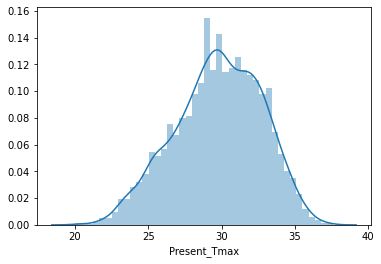

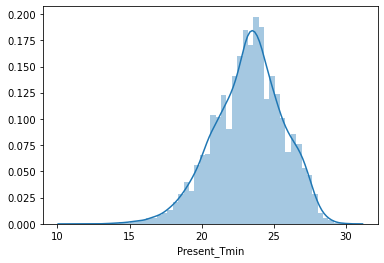

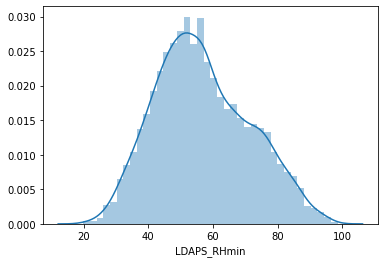

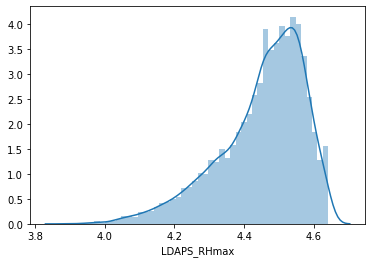

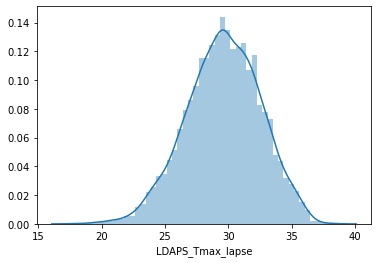

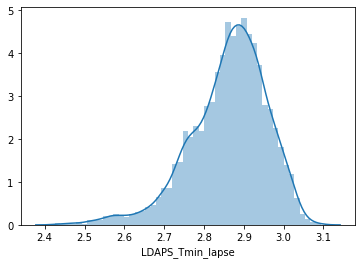

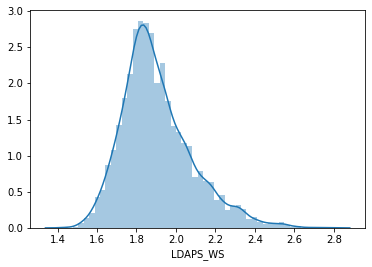

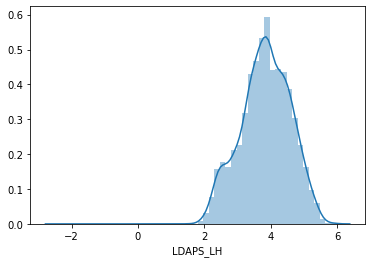

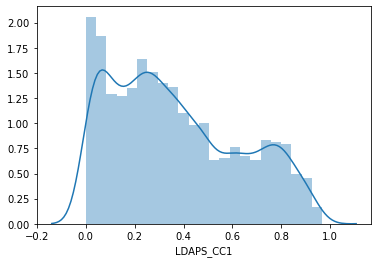

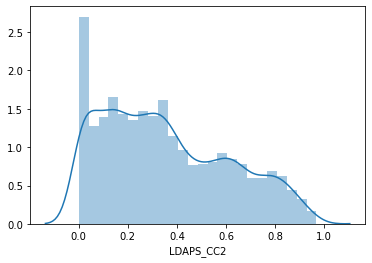

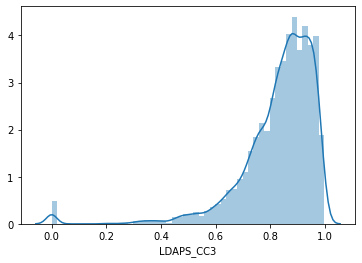

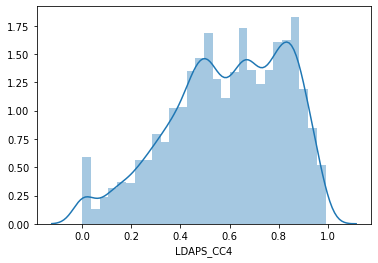

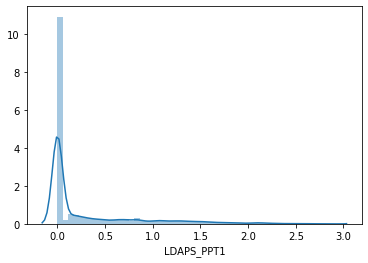

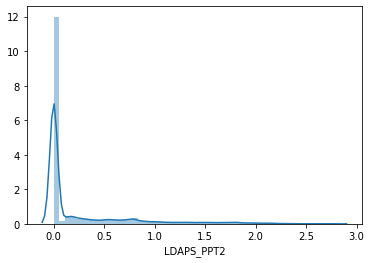

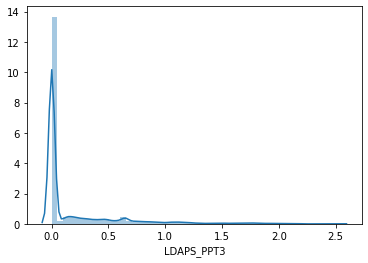

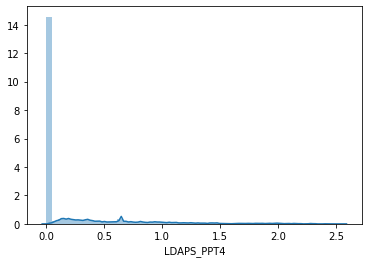

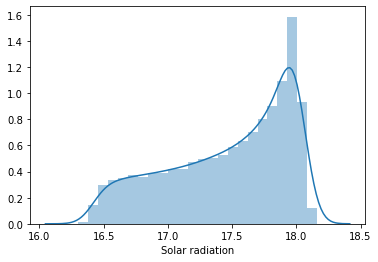

In [195]:
col =x.columns
for i in x[col]:
    plt.figure()
    sns.distplot(x[i])

In [196]:
#from scipy.stats import zscore

In [197]:
#zscr=np.abs(zscore(x))
#thereshold = 3
#print(np.where(zscr>3))

In [198]:
#Outliners
#x.shape

In [199]:
#xnew=x[(zscr<3).all(axis=1)]
#xnew.shape

In [200]:
#col =xnew.columns
#for i in xnew[col]:
 #   plt.figure()
  #  sns.distplot(xnew[i])

In [201]:
lr = LinearRegression()
from sklearn.metrics import r2_score

In [227]:
for i in range(0,1000):
    x_train,x_test,y_Tmax_train,y_Tmax_test=train_test_split(x,y_Tmax,test_size=0.2,random_state=i)
    lr.fit(x_train,y_Tmax_train)
    pred_train1 = lr.predict(x_train)
    pred_test1 = lr.predict(x_test)
    print("At Random State",i,"the traning accuracy is :-", r2_score(y_Tmax_train,pred_train1))
    print("\n")

At Random State 0 the traning accuracy is :- 0.7468940114025753


At Random State 1 the traning accuracy is :- 0.7509729882674641


At Random State 2 the traning accuracy is :- 0.7554213388500518


At Random State 3 the traning accuracy is :- 0.7540584061030847


At Random State 4 the traning accuracy is :- 0.7524522087197781


At Random State 5 the traning accuracy is :- 0.7540376097115763


At Random State 6 the traning accuracy is :- 0.7573879544825393


At Random State 7 the traning accuracy is :- 0.7557067888743623


At Random State 8 the traning accuracy is :- 0.7618344618665367


At Random State 9 the traning accuracy is :- 0.7525432827363783


At Random State 10 the traning accuracy is :- 0.753017579630543


At Random State 11 the traning accuracy is :- 0.7575226440666304


At Random State 12 the traning accuracy is :- 0.7555506161007834


At Random State 13 the traning accuracy is :- 0.7521791480889258


At Random State 14 the traning accuracy is :- 0.7519834029440862


At Ran

At Random State 127 the traning accuracy is :- 0.751420899348096


At Random State 128 the traning accuracy is :- 0.7548522291454222


At Random State 129 the traning accuracy is :- 0.7491839029358678


At Random State 130 the traning accuracy is :- 0.7541699997043253


At Random State 131 the traning accuracy is :- 0.7569628958984107


At Random State 132 the traning accuracy is :- 0.7534520265944703


At Random State 133 the traning accuracy is :- 0.7582117359661894


At Random State 134 the traning accuracy is :- 0.7547763446469088


At Random State 135 the traning accuracy is :- 0.7556221711783939


At Random State 136 the traning accuracy is :- 0.7558469953694281


At Random State 137 the traning accuracy is :- 0.7538067453748317


At Random State 138 the traning accuracy is :- 0.7514957398003881


At Random State 139 the traning accuracy is :- 0.7540920152049035


At Random State 140 the traning accuracy is :- 0.7537754010952856


At Random State 141 the traning accuracy is :- 0.

At Random State 255 the traning accuracy is :- 0.7532175703331493


At Random State 256 the traning accuracy is :- 0.7545460543061934


At Random State 257 the traning accuracy is :- 0.7583642901356507


At Random State 258 the traning accuracy is :- 0.7545620593425252


At Random State 259 the traning accuracy is :- 0.7541904550326


At Random State 260 the traning accuracy is :- 0.7544159517387231


At Random State 261 the traning accuracy is :- 0.7544966994426408


At Random State 262 the traning accuracy is :- 0.7564503634341946


At Random State 263 the traning accuracy is :- 0.7536004328183057


At Random State 264 the traning accuracy is :- 0.7517730101800956


At Random State 265 the traning accuracy is :- 0.7560028812239629


At Random State 266 the traning accuracy is :- 0.7538414463386073


At Random State 267 the traning accuracy is :- 0.7541172438323306


At Random State 268 the traning accuracy is :- 0.7504404196424287


At Random State 269 the traning accuracy is :- 0.75

At Random State 377 the traning accuracy is :- 0.7561827741968927


At Random State 378 the traning accuracy is :- 0.7543467845405213


At Random State 379 the traning accuracy is :- 0.7572434852469045


At Random State 380 the traning accuracy is :- 0.7546288883937124


At Random State 381 the traning accuracy is :- 0.7540541549468732


At Random State 382 the traning accuracy is :- 0.7560202413411754


At Random State 383 the traning accuracy is :- 0.7559892673729174


At Random State 384 the traning accuracy is :- 0.7587952026566505


At Random State 385 the traning accuracy is :- 0.7565256642163034


At Random State 386 the traning accuracy is :- 0.7592593861368404


At Random State 387 the traning accuracy is :- 0.7559483689498769


At Random State 388 the traning accuracy is :- 0.7569129289271675


At Random State 389 the traning accuracy is :- 0.7602527721735091


At Random State 390 the traning accuracy is :- 0.7540977754864922


At Random State 391 the traning accuracy is :- 0

At Random State 501 the traning accuracy is :- 0.7576850151545734


At Random State 502 the traning accuracy is :- 0.7548657731518564


At Random State 503 the traning accuracy is :- 0.7556537073291756


At Random State 504 the traning accuracy is :- 0.756055153677762


At Random State 505 the traning accuracy is :- 0.7488163695072289


At Random State 506 the traning accuracy is :- 0.7554872850120022


At Random State 507 the traning accuracy is :- 0.75968589526955


At Random State 508 the traning accuracy is :- 0.7570227719449453


At Random State 509 the traning accuracy is :- 0.7619236883057765


At Random State 510 the traning accuracy is :- 0.7529873125742893


At Random State 511 the traning accuracy is :- 0.7491088840358392


At Random State 512 the traning accuracy is :- 0.753015839316093


At Random State 513 the traning accuracy is :- 0.7535485723658045


At Random State 514 the traning accuracy is :- 0.7507669405385754


At Random State 515 the traning accuracy is :- 0.750

At Random State 630 the traning accuracy is :- 0.7531248004933759


At Random State 631 the traning accuracy is :- 0.7615332348900079


At Random State 632 the traning accuracy is :- 0.755407439031748


At Random State 633 the traning accuracy is :- 0.7521835675150244


At Random State 634 the traning accuracy is :- 0.7547435641403759


At Random State 635 the traning accuracy is :- 0.7523701860885147


At Random State 636 the traning accuracy is :- 0.7583969251901023


At Random State 637 the traning accuracy is :- 0.7530253353203699


At Random State 638 the traning accuracy is :- 0.7571036414846201


At Random State 639 the traning accuracy is :- 0.7596472465323088


At Random State 640 the traning accuracy is :- 0.7543956869957814


At Random State 641 the traning accuracy is :- 0.7536544417630473


At Random State 642 the traning accuracy is :- 0.7588692257366829


At Random State 643 the traning accuracy is :- 0.7547298916486997


At Random State 644 the traning accuracy is :- 0.

At Random State 758 the traning accuracy is :- 0.7502455091294105


At Random State 759 the traning accuracy is :- 0.7527547334825206


At Random State 760 the traning accuracy is :- 0.7560010250450371


At Random State 761 the traning accuracy is :- 0.7552704692113491


At Random State 762 the traning accuracy is :- 0.7525336336579281


At Random State 763 the traning accuracy is :- 0.7571024410430671


At Random State 764 the traning accuracy is :- 0.7572581872868785


At Random State 765 the traning accuracy is :- 0.7557734832471575


At Random State 766 the traning accuracy is :- 0.7529118572258612


At Random State 767 the traning accuracy is :- 0.7559043360366607


At Random State 768 the traning accuracy is :- 0.7564981471448669


At Random State 769 the traning accuracy is :- 0.7528340173960273


At Random State 770 the traning accuracy is :- 0.7580897072680871


At Random State 771 the traning accuracy is :- 0.752687581268557


At Random State 772 the traning accuracy is :- 0.

At Random State 881 the traning accuracy is :- 0.7528715606872188


At Random State 882 the traning accuracy is :- 0.7529779748012239


At Random State 883 the traning accuracy is :- 0.7548452635475347


At Random State 884 the traning accuracy is :- 0.7576881331703338


At Random State 885 the traning accuracy is :- 0.7529407319079434


At Random State 886 the traning accuracy is :- 0.7539249444820141


At Random State 887 the traning accuracy is :- 0.7540715954288454


At Random State 888 the traning accuracy is :- 0.7536318370389599


At Random State 889 the traning accuracy is :- 0.7571667079433915


At Random State 890 the traning accuracy is :- 0.7545251109366745


At Random State 891 the traning accuracy is :- 0.7494599578925856


At Random State 892 the traning accuracy is :- 0.7542639680678347


At Random State 893 the traning accuracy is :- 0.7509703739801936


At Random State 894 the traning accuracy is :- 0.7510793829000499


At Random State 895 the traning accuracy is :- 0

In [228]:
for i in range(0,1000):
    x_train,x_test,y_Tmin_train,y_Tmin_test=train_test_split(x,y_Tmin,test_size=0.2,random_state=i)
    lr.fit(x_train,y_Tmin_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print("At Random State",i,"the traning accuracy is :-", r2_score(y_Tmin_train,pred_train))
    print("\n")

At Random State 0 the traning accuracy is :- 0.8171178113800361


At Random State 1 the traning accuracy is :- 0.8184894094815568


At Random State 2 the traning accuracy is :- 0.8194284833257688


At Random State 3 the traning accuracy is :- 0.815689284179277


At Random State 4 the traning accuracy is :- 0.8195386802058278


At Random State 5 the traning accuracy is :- 0.8180827198924225


At Random State 6 the traning accuracy is :- 0.8217398975903061


At Random State 7 the traning accuracy is :- 0.8186751164626934


At Random State 8 the traning accuracy is :- 0.8203686257598979


At Random State 9 the traning accuracy is :- 0.8170681660409721


At Random State 10 the traning accuracy is :- 0.8154311521707354


At Random State 11 the traning accuracy is :- 0.8203579925106114


At Random State 12 the traning accuracy is :- 0.824555599584569


At Random State 13 the traning accuracy is :- 0.8235366423436089


At Random State 14 the traning accuracy is :- 0.8193912685373124


At Rand

At Random State 125 the traning accuracy is :- 0.8223135980997354


At Random State 126 the traning accuracy is :- 0.8183815302872033


At Random State 127 the traning accuracy is :- 0.8183974172091517


At Random State 128 the traning accuracy is :- 0.8207160723284012


At Random State 129 the traning accuracy is :- 0.8166713698827225


At Random State 130 the traning accuracy is :- 0.8190071251541136


At Random State 131 the traning accuracy is :- 0.8175696374130126


At Random State 132 the traning accuracy is :- 0.8183403127037379


At Random State 133 the traning accuracy is :- 0.8208073221144225


At Random State 134 the traning accuracy is :- 0.8183931652879397


At Random State 135 the traning accuracy is :- 0.8187514884380771


At Random State 136 the traning accuracy is :- 0.8212203119985381


At Random State 137 the traning accuracy is :- 0.8184110370719293


At Random State 138 the traning accuracy is :- 0.8179424713459431


At Random State 139 the traning accuracy is :- 0

At Random State 247 the traning accuracy is :- 0.8194840911516528


At Random State 248 the traning accuracy is :- 0.8239463003000616


At Random State 249 the traning accuracy is :- 0.8166600597700109


At Random State 250 the traning accuracy is :- 0.8173311156069023


At Random State 251 the traning accuracy is :- 0.8228265356008584


At Random State 252 the traning accuracy is :- 0.8171237522862616


At Random State 253 the traning accuracy is :- 0.8174734675384305


At Random State 254 the traning accuracy is :- 0.819855819957569


At Random State 255 the traning accuracy is :- 0.8209836551478449


At Random State 256 the traning accuracy is :- 0.8178225924701986


At Random State 257 the traning accuracy is :- 0.818814571910325


At Random State 258 the traning accuracy is :- 0.8207664096918295


At Random State 259 the traning accuracy is :- 0.8194788966495048


At Random State 260 the traning accuracy is :- 0.8203333232060697


At Random State 261 the traning accuracy is :- 0.8

At Random State 371 the traning accuracy is :- 0.8167596321027246


At Random State 372 the traning accuracy is :- 0.8190930892617759


At Random State 373 the traning accuracy is :- 0.823815300700935


At Random State 374 the traning accuracy is :- 0.8205634479806594


At Random State 375 the traning accuracy is :- 0.8175206893983032


At Random State 376 the traning accuracy is :- 0.8165346704335844


At Random State 377 the traning accuracy is :- 0.8182926411090574


At Random State 378 the traning accuracy is :- 0.819817594641971


At Random State 379 the traning accuracy is :- 0.8200784082012456


At Random State 380 the traning accuracy is :- 0.8172534568010763


At Random State 381 the traning accuracy is :- 0.8186097891458554


At Random State 382 the traning accuracy is :- 0.8231477699234901


At Random State 383 the traning accuracy is :- 0.8190317693943879


At Random State 384 the traning accuracy is :- 0.8212770965047758


At Random State 385 the traning accuracy is :- 0.8

At Random State 496 the traning accuracy is :- 0.8202544994103701


At Random State 497 the traning accuracy is :- 0.8175188882858616


At Random State 498 the traning accuracy is :- 0.8219558295984896


At Random State 499 the traning accuracy is :- 0.8198492571958234


At Random State 500 the traning accuracy is :- 0.8199968471291073


At Random State 501 the traning accuracy is :- 0.8193145576707773


At Random State 502 the traning accuracy is :- 0.8178447930158913


At Random State 503 the traning accuracy is :- 0.8211575253785101


At Random State 504 the traning accuracy is :- 0.817676837727392


At Random State 505 the traning accuracy is :- 0.8165855718240543


At Random State 506 the traning accuracy is :- 0.8171424338754556


At Random State 507 the traning accuracy is :- 0.8225039062824057


At Random State 508 the traning accuracy is :- 0.8207997098859371


At Random State 509 the traning accuracy is :- 0.8205848535737925


At Random State 510 the traning accuracy is :- 0.

At Random State 618 the traning accuracy is :- 0.8224699746876841


At Random State 619 the traning accuracy is :- 0.820845295933474


At Random State 620 the traning accuracy is :- 0.8163513706316253


At Random State 621 the traning accuracy is :- 0.8180428237883601


At Random State 622 the traning accuracy is :- 0.8214525801034113


At Random State 623 the traning accuracy is :- 0.815751160165267


At Random State 624 the traning accuracy is :- 0.8214237781588283


At Random State 625 the traning accuracy is :- 0.8219768450846474


At Random State 626 the traning accuracy is :- 0.8204693027779829


At Random State 627 the traning accuracy is :- 0.8197512035816551


At Random State 628 the traning accuracy is :- 0.8184333416568953


At Random State 629 the traning accuracy is :- 0.8167963664796131


At Random State 630 the traning accuracy is :- 0.820840217503239


At Random State 631 the traning accuracy is :- 0.8264157536887059


At Random State 632 the traning accuracy is :- 0.81

At Random State 747 the traning accuracy is :- 0.8195475959529115


At Random State 748 the traning accuracy is :- 0.819887909986617


At Random State 749 the traning accuracy is :- 0.8193357517526001


At Random State 750 the traning accuracy is :- 0.8180388765101668


At Random State 751 the traning accuracy is :- 0.819058557921969


At Random State 752 the traning accuracy is :- 0.820411213875708


At Random State 753 the traning accuracy is :- 0.8200541950044999


At Random State 754 the traning accuracy is :- 0.8172828052957378


At Random State 755 the traning accuracy is :- 0.8198540996673446


At Random State 756 the traning accuracy is :- 0.8212705745134982


At Random State 757 the traning accuracy is :- 0.8193979516496546


At Random State 758 the traning accuracy is :- 0.8181907070097487


At Random State 759 the traning accuracy is :- 0.8187310800631502


At Random State 760 the traning accuracy is :- 0.8183617912676443


At Random State 761 the traning accuracy is :- 0.82

At Random State 870 the traning accuracy is :- 0.8213495708239578


At Random State 871 the traning accuracy is :- 0.818656393349712


At Random State 872 the traning accuracy is :- 0.8190385249927347


At Random State 873 the traning accuracy is :- 0.8177910215523377


At Random State 874 the traning accuracy is :- 0.8172347603130432


At Random State 875 the traning accuracy is :- 0.8199886484460738


At Random State 876 the traning accuracy is :- 0.8189402820037062


At Random State 877 the traning accuracy is :- 0.8181891136118692


At Random State 878 the traning accuracy is :- 0.8193386350937487


At Random State 879 the traning accuracy is :- 0.8181234774037907


At Random State 880 the traning accuracy is :- 0.8168211284049132


At Random State 881 the traning accuracy is :- 0.8184869870157031


At Random State 882 the traning accuracy is :- 0.8188058293423319


At Random State 883 the traning accuracy is :- 0.8222486385138954


At Random State 884 the traning accuracy is :- 0.



At Random State 993 the traning accuracy is :- 0.8252141272618919


At Random State 994 the traning accuracy is :- 0.8210188065783746


At Random State 995 the traning accuracy is :- 0.8185700053329648


At Random State 996 the traning accuracy is :- 0.8217170172574776


At Random State 997 the traning accuracy is :- 0.8181292063788798


At Random State 998 the traning accuracy is :- 0.8198024313147831


At Random State 999 the traning accuracy is :- 0.8211905341854546




In [223]:
x_train,x_test,y_Tmax_train,y_Tmax_test=train_test_split(x,y_Tmax,test_size=0.2,random_state=4)

In [224]:
lr.fit(x_train,y_Tmax_train)

LinearRegression()

In [225]:
pred_test1 = lr.predict(x_test)

In [226]:
print(r2_score(y_Tmax_test,pred_test1))

0.758433128911379


In [229]:
Train_accu = r2_score(y_Tmax_train,pred_train1)
Test_accu = r2_score(y_Tmax_test,pred_test1)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr,x,y_Tmax,cv=j)
    cv_mean = cv_score.mean()
    print("At score:",j,"the cv score:",cv_mean,"and accu for train",Train_accu,"and accu for test",Test_accu)
    print("\n")

At score: 2 the cv score: 0.6769321367713488 and accu for train 0.7580262935339818 and accu for test 0.7351433328717534


At score: 3 the cv score: 0.6990261359006711 and accu for train 0.7580262935339818 and accu for test 0.7351433328717534


At score: 4 the cv score: 0.688671219607573 and accu for train 0.7580262935339818 and accu for test 0.7351433328717534


At score: 5 the cv score: 0.6854172707034887 and accu for train 0.7580262935339818 and accu for test 0.7351433328717534


At score: 6 the cv score: 0.6834356436776376 and accu for train 0.7580262935339818 and accu for test 0.7351433328717534


At score: 7 the cv score: 0.6805677275704698 and accu for train 0.7580262935339818 and accu for test 0.7351433328717534


At score: 8 the cv score: 0.6693665491721659 and accu for train 0.7580262935339818 and accu for test 0.7351433328717534


At score: 9 the cv score: 0.6054479947378191 and accu for train 0.7580262935339818 and accu for test 0.7351433328717534




In [210]:
x_train,x_test,y_Tmin_train,y_Tmin_test=train_test_split(x,y_Tmin,test_size=0.2,random_state=6)

In [211]:
lr.fit(x_train,y_Tmin_train)

LinearRegression()

In [220]:
pred_test = lr.predict(x_test)

In [214]:
print(r2_score(y_Tmin_test,pred_test))

0.80995173512156


In [215]:
Train_accu = r2_score(y_Tmin_train,pred_train)
Test_accu = r2_score(y_Tmin_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr,x,y_Tmin,cv=j)
    cv_mean = cv_score.mean()
    print("At score:",j,"the cv score:",cv_mean,"and accu for train",Train_accu,"and accu for test",Test_accu)
    print("\n")

At score: 2 the cv score: 0.7940280229981667 and accu for train -0.8142083961281397 and accu for test 0.80995173512156


At score: 3 the cv score: 0.7632121189988874 and accu for train -0.8142083961281397 and accu for test 0.80995173512156


At score: 4 the cv score: 0.775357443954843 and accu for train -0.8142083961281397 and accu for test 0.80995173512156


At score: 5 the cv score: 0.7610218195475414 and accu for train -0.8142083961281397 and accu for test 0.80995173512156


At score: 6 the cv score: 0.7454312605639339 and accu for train -0.8142083961281397 and accu for test 0.80995173512156


At score: 7 the cv score: 0.7524667313823283 and accu for train -0.8142083961281397 and accu for test 0.80995173512156


At score: 8 the cv score: 0.7550646862686045 and accu for train -0.8142083961281397 and accu for test 0.80995173512156


At score: 9 the cv score: 0.6701782770211355 and accu for train -0.8142083961281397 and accu for test 0.80995173512156




In [216]:
from sklearn.tree import DecisionTreeRegressor

In [217]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_Tmin_train)
preddt = dt.predict(x_test)

dts = r2_score(y_Tmin_test,preddt)
print("dt score",dts*100)

dts_score = cross_val_score(dt,x,y_Tmin,cv = 2)
dtc_score = dts_score.mean()
print("cross val score",dtc_score*100)

dt score 76.34246213613568
cross val score 57.01917841738143


In [218]:
print('error:')
print(mean_absolute_error(y_Tmin_test,pred_test))
print(mean_squared_error(y_Tmin_test,pred_test))
print(np.sqrt(mean_squared_error(y_Tmin_test,pred_test)))

error:
0.8275763559693329
1.1286631327692804
1.062385585731132


In [219]:
print('error:')
print(mean_absolute_error(y_Tmax_test,pred_test))
print(mean_squared_error(y_Tmax_test,pred_test))
print(np.sqrt(mean_squared_error(y_Tmax_test,pred_test)))

error:
7.323559455589607
59.83611781889205
7.735380909747887


In [236]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import joblib
import warnings
warnings.filterwarnings('ignore')

In [237]:
rfmax = RandomForestRegressor()
rfmax.fit(x_train,y_Tmax_train)
rfmax.score(x_train,y_Tmax_train)
predrfmax = rfmax.predict(x_test)

rfmaxs = r2_score(y_Tmax_test,predrfmax)
print('R2 Score',rfmaxs*100)

R2 Score 88.74745282340655


In [238]:
rfmax_score = cross_val_score(rfmax,x,y_Tmax,cv = 5)
rfmax_score

array([0.69470447, 0.63911248, 0.62033205, 0.79004711, 0.62655863])

In [239]:
print('error:')
print(mean_absolute_error(y_Tmax_test,predrfmax))
print(mean_squared_error(y_Tmax_test,predrfmax))
print(np.sqrt(mean_squared_error(y_Tmax_test,predrfmax)))

error:
0.7635482470876682
1.0386019474400412
1.0191182205416804


In [241]:
rfmin = RandomForestRegressor()
rfmin.fit(x_train,y_Tmin_train)
rfmin.score(x_train,y_Tmin_train)
predrfmin = rfmin.predict(x_test)

rfmins = r2_score(y_Tmin_test,predrfmin)
print('R2 Score',rfmins*100)

R2 Score 89.14640921145305


In [243]:
rfmin_score = cross_val_score(rfmin,x,y_Tmin,cv = 5)
rfmin_score

array([0.61697688, 0.61912135, 0.77711115, 0.84257523, 0.84301688])

In [244]:
import pickle
filename = 'ForecastTmax.pkl'
pickle.dump(rfmax,open(filename,'wb'))

In [245]:
filename = 'ForecastTmin.pkl'
pickle.dump(rfmin,open(filename,'wb'))

In [246]:
loaded_model = pickle.load(open('ForecastTmax.pkl','rb'))
result = loaded_model.score(x_test,y_Tmax_test)
print(result)

0.8874745282340655


In [247]:
loaded_model = pickle.load(open('ForecastTmin.pkl','rb'))
result = loaded_model.score(x_test,y_Tmin_test)
print(result)

0.8914640921145305


In [248]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],predrfmax[:]],index=["predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
predicted,25.740,23.974657,22.736,21.928328,24.229328,26.260,25.245000,22.945000,23.283328,25.675000,...,21.330,21.403328,23.987,25.250,23.944,23.056328,20.199,23.985,23.181,21.828
Original,34.401,29.727754,31.181,32.491000,28.867000,32.261,30.621754,29.976754,26.972000,31.532754,...,31.595,28.500000,34.359,31.418,33.620,26.549000,32.709,30.676,29.546,29.255


In [249]:
conclusionT = pd.DataFrame([loaded_model.predict(x_test)[:],predrfmin[:]],index=["predicted","Original"])
conclusionT

,0,1,2,3,4,5,6,7,8,9,...,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549
predicted,25.74,23.974657,22.736,21.928328,24.229328,26.26,25.245,22.945,23.283328,25.675,...,21.33,21.403328,23.987,25.25,23.944,23.056328,20.199,23.985,23.181,21.828
Original,25.74,23.974657,22.736,21.928328,24.229328,26.26,25.245,22.945,23.283328,25.675,...,21.33,21.403328,23.987,25.25,23.944,23.056328,20.199,23.985,23.181,21.828
